All text messages have one of three numbers, which are the label: -1, 0 or 1. Those labels mean:

-1: negative sentiment.

0: neutral sentiment.

1: positive sentiment.

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import spacy

#from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

from sklearn.model_selection import train_test_split

In [160]:
#Extract reddit data
reddit_data = pd.read_csv('reddit_Data.csv')
reddit_data.rename(columns = {'clean_comment': 'text'}, inplace = True)

In [161]:
#Extract twitter data
twitter_data = pd.read_csv('Twitter_Data.csv')
twitter_data.rename(columns = {'clean_text': 'text'}, inplace = True)

In [162]:
#Combine both dataframes into one master dataframe
data = pd.concat([reddit_data, twitter_data], ignore_index = True)

FIRST ANALYSIS:

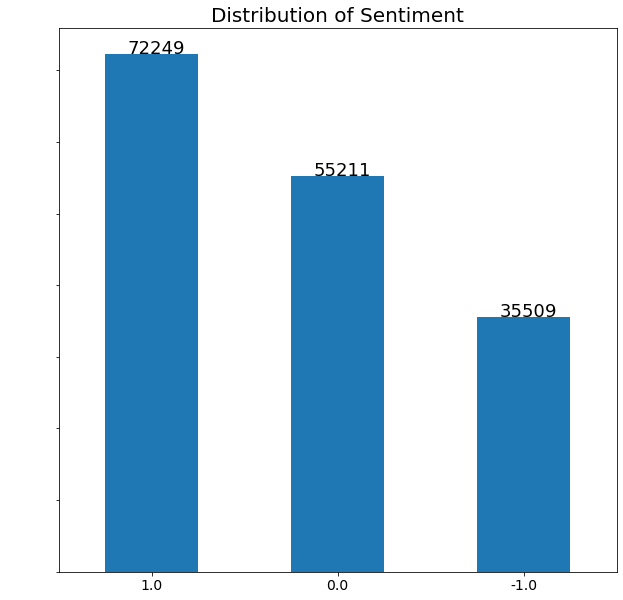

In [198]:
fig , ax = plt.subplots(figsize = (10,10))
ax = twitter_data['category'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 0, size = 14)
plt.yticks(size = 14, color = 'white')
plt.title('Distribution of Sentiment', size = 20)

ax.annotate(text = twitter_data['category'].value_counts().values[0], xy = (-0.13,twitter_data['category'].value_counts().values[0]), size = 18)
ax.annotate(text = twitter_data['category'].value_counts().values[1], xy = (0.87,twitter_data['category'].value_counts().values[1]), size = 18)
ax.annotate(text = twitter_data['category'].value_counts().values[2], xy = (1.87,twitter_data['category'].value_counts().values[2]), size = 18)

plt.show()

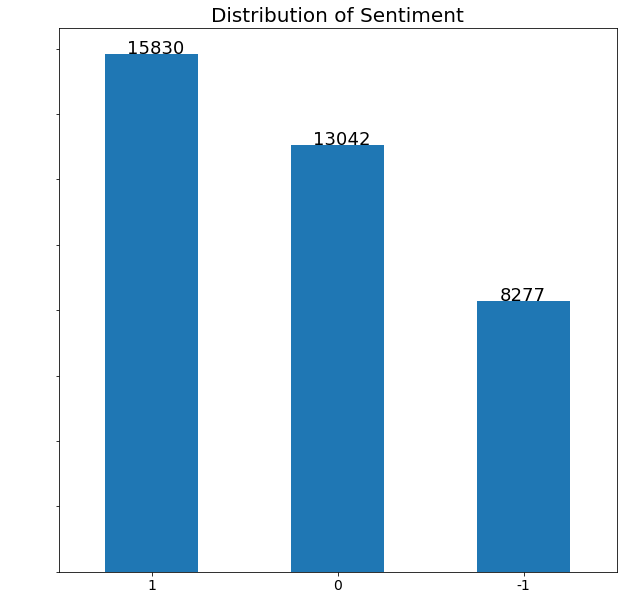

In [199]:
fig , ax = plt.subplots(figsize = (10,10))
ax = reddit_data['category'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 0, size = 14)
plt.yticks(size = 14, color = 'white')
plt.title('Distribution of Sentiment', size = 20)

ax.annotate(text = reddit_data['category'].value_counts().values[0], xy = (-0.13,reddit_data['category'].value_counts().values[0]), size = 18)
ax.annotate(text = reddit_data['category'].value_counts().values[1], xy = (0.87,reddit_data['category'].value_counts().values[1]), size = 18)
ax.annotate(text = reddit_data['category'].value_counts().values[2], xy = (1.87,reddit_data['category'].value_counts().values[2]), size = 18)

plt.show()

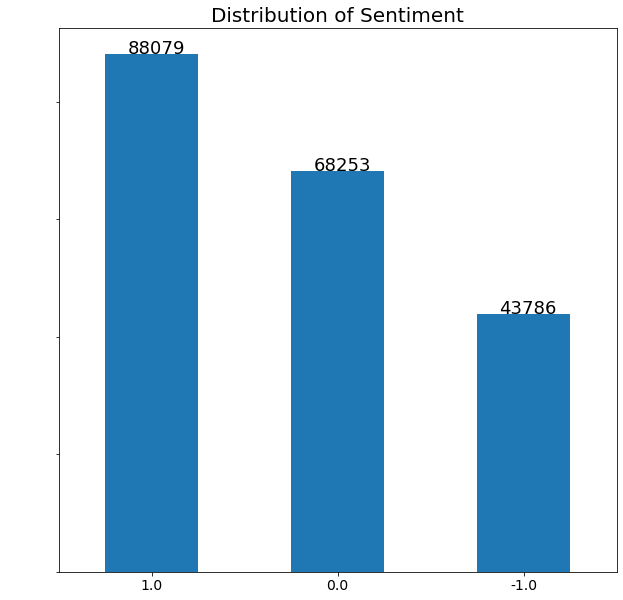

In [200]:
fig , ax = plt.subplots(figsize = (10,10))
ax = data['category'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 0, size = 14)
plt.yticks(size = 14, color = 'white')
plt.title('Distribution of Sentiment', size = 20)

ax.annotate(text = data['category'].value_counts().values[0], xy = (-0.13,88079), size = 18)
ax.annotate(text = data['category'].value_counts().values[1], xy = (0.87,68253), size = 18)
ax.annotate(text = data['category'].value_counts().values[2], xy = (1.87,43786), size = 18)

plt.show()

MODEL AND PREDICTION MADE WITH TWITTER DATAFRAME:

In [166]:
twitter_data.isna().sum()

text        4
category    7
dtype: int64

In [167]:
#Drop rows with null values
twitter_data.dropna(axis = 0, inplace = True)

In [168]:
#Checking the shape of the data to ensure nothing is broken
twitter_data.shape

(162969, 2)

In [169]:
# Create a Vectorizer Object using default parameters
hash_vectorizer = HashingVectorizer()

# Convert a collection of text documents to a matrix of token counts
token_count_matrix=hash_vectorizer.fit_transform(twitter_data['text'])
print(f'The size of the count matrix for the texts = {token_count_matrix.get_shape()}')
print(f'The sparse count matrix is as follows:')
print(token_count_matrix)

# Create a tf_idf object using default parameters
tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

# Fit to the count matrix, then transform it to a normalized tf-idf representation
twitter_tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)

#print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.get_shape()}')
#print(f'The sparse tf_idf matrix is as follows:')
#print(tf_idf_matrix)

The size of the count matrix for the texts = (162969, 1048576)
The sparse count matrix is as follows:
  (0, 160541)	0.14907119849998599
  (0, 168557)	0.14907119849998599
  (0, 180525)	-0.4472135954999579
  (0, 232512)	0.14907119849998599
  (0, 263274)	0.14907119849998599
  (0, 277794)	-0.14907119849998599
  (0, 286878)	-0.29814239699997197
  (0, 288398)	0.14907119849998599
  (0, 360502)	0.29814239699997197
  (0, 387101)	-0.14907119849998599
  (0, 433698)	0.14907119849998599
  (0, 434864)	0.14907119849998599
  (0, 449993)	-0.14907119849998599
  (0, 465141)	-0.14907119849998599
  (0, 482215)	-0.14907119849998599
  (0, 484920)	-0.14907119849998599
  (0, 490370)	0.29814239699997197
  (0, 522187)	0.14907119849998599
  (0, 614924)	0.14907119849998599
  (0, 646934)	0.14907119849998599
  (0, 747378)	-0.14907119849998599
  (0, 748718)	0.14907119849998599
  (0, 808196)	-0.14907119849998599
  (0, 839641)	-0.14907119849998599
  (0, 865698)	0.14907119849998599
  :	:
  (162968, 257965)	0.16222142113

In [170]:
#Creating, fitting and scoring classifier
twitter_classifier = LinearSVC()
twitter_classifier.fit(X_train_twitter, y_train_twitter)

LinearSVC()

In [171]:
# Getting X and y

X_twitter = twitter_tf_idf_matrix
y_twitter = twitter_data.category

#Splitting the data into training and testing

X_train_twitter, X_test_twitter, y_train_twitter, y_test_twitter = train_test_split(X_twitter, y_twitter, test_size=0.1)

In [172]:
reddit_data.isna().sum()

text        100
category      0
dtype: int64

In [173]:
#Drop rows with null values
reddit_data.dropna(axis = 0, inplace = True)

In [174]:
# Create a Vectorizer Object using default parameters
hash_vectorizer = HashingVectorizer()

# Convert a collection of text documents to a matrix of token counts
token_count_matrix=hash_vectorizer.fit_transform(reddit_data['text'])
print(f'The size of the count matrix for the texts = {token_count_matrix.get_shape()}')
print(f'The sparse count matrix is as follows:')
print(token_count_matrix)

# Create a tf_idf object using default parameters
tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

# Fit to the count matrix, then transform it to a normalized tf-idf representation
reddit_tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)

#print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.get_shape()}')
#print(f'The sparse tf_idf matrix is as follows:')
#print(tf_idf_matrix)

The size of the count matrix for the texts = (37149, 1048576)
The sparse count matrix is as follows:
  (0, 66497)	0.14002800840280097
  (0, 88541)	0.28005601680560194
  (0, 99311)	0.14002800840280097
  (0, 158803)	-0.28005601680560194
  (0, 176558)	0.14002800840280097
  (0, 180525)	-0.14002800840280097
  (0, 189643)	-0.14002800840280097
  (0, 216640)	-0.14002800840280097
  (0, 246361)	-0.14002800840280097
  (0, 281416)	-0.14002800840280097
  (0, 286878)	-0.28005601680560194
  (0, 298956)	0.14002800840280097
  (0, 331884)	-0.14002800840280097
  (0, 336791)	0.14002800840280097
  (0, 570460)	-0.14002800840280097
  (0, 590295)	-0.14002800840280097
  (0, 636025)	0.14002800840280097
  (0, 639622)	-0.14002800840280097
  (0, 647008)	-0.14002800840280097
  (0, 694840)	0.14002800840280097
  (0, 699224)	-0.14002800840280097
  (0, 720710)	0.14002800840280097
  (0, 770962)	-0.14002800840280097
  (0, 777676)	0.14002800840280097
  (0, 873637)	-0.14002800840280097
  :	:
  (37145, 612207)	-0.2085144140

In [175]:
# Getting X and y

X_reddit = reddit_tf_idf_matrix
y_reddit = reddit_data.category

#Splitting the data into training and testing

X_train_reddit, X_test_reddit, y_train_reddit, y_test_reddit = train_test_split(X_reddit, y_reddit, test_size=0.1)

In [176]:
#Creating, fitting and scoring classifier
reddit_classifier = LinearSVC()
reddit_classifier.fit(X_train_reddit, y_train_reddit)

LinearSVC()

Predictions using both models:

In [177]:
print(f"Accuracy: {twitter_classifier.score(X_test_twitter, y_test_twitter) * 100:.3f}%", )

Accuracy: 97.576%


In [178]:
print(f"Accuracy: {twitter_classifier.score(X_test_reddit, y_test_reddit) * 100:.3f}%", )

Accuracy: 93.082%


In [179]:
print(f"Accuracy: {reddit_classifier.score(X_test_reddit, y_test_reddit) * 100:.3f}%", )

Accuracy: 89.098%


In [180]:
print(f"Accuracy: {reddit_classifier.score(X_test_twitter, y_test_twitter) * 100:.3f}%", )

Accuracy: 86.028%


MODEL AND PREDICTION MADE WITH BOTH DATAFRAMES:

In [184]:
data.isna().sum()

text        104
category      7
dtype: int64

In [185]:
#Drop rows with null values
data.dropna(axis = 0, inplace = True)

In [186]:
#Checking the shape of the data to ensure nothing is broken
data.shape

(200118, 2)

In [187]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Create a Vectorizer Object using default parameters
hash_vectorizer = HashingVectorizer()

# Convert a collection of text documents to a matrix of token counts
token_count_matrix=hash_vectorizer.fit_transform(data['text'])
print(f'The size of the count matrix for the texts = {token_count_matrix.get_shape()}')
print(f'The sparse count matrix is as follows:')
print(token_count_matrix)

# Create a tf_idf object using default parameters
tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

# Fit to the count matrix, then transform it to a normalized tf-idf representation
tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)

print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.get_shape()}')
print(f'The sparse tf_idf matrix is as follows:')
print(tf_idf_matrix)

The size of the count matrix for the texts = (200118, 1048576)
The sparse count matrix is as follows:
  (0, 66497)	0.14002800840280097
  (0, 88541)	0.28005601680560194
  (0, 99311)	0.14002800840280097
  (0, 158803)	-0.28005601680560194
  (0, 176558)	0.14002800840280097
  (0, 180525)	-0.14002800840280097
  (0, 189643)	-0.14002800840280097
  (0, 216640)	-0.14002800840280097
  (0, 246361)	-0.14002800840280097
  (0, 281416)	-0.14002800840280097
  (0, 286878)	-0.28005601680560194
  (0, 298956)	0.14002800840280097
  (0, 331884)	-0.14002800840280097
  (0, 336791)	0.14002800840280097
  (0, 570460)	-0.14002800840280097
  (0, 590295)	-0.14002800840280097
  (0, 636025)	0.14002800840280097
  (0, 639622)	-0.14002800840280097
  (0, 647008)	-0.14002800840280097
  (0, 694840)	0.14002800840280097
  (0, 699224)	-0.14002800840280097
  (0, 720710)	0.14002800840280097
  (0, 770962)	-0.14002800840280097
  (0, 777676)	0.14002800840280097
  (0, 873637)	-0.14002800840280097
  :	:
  (200117, 257965)	0.162221421

In [188]:
# Getting X and y

X = tf_idf_matrix
y = data.category

#Splitting the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [189]:
#Creating, fitting and scoring classifier
classifier = LinearSVC()
classifier.fit(X_train, y_train)
print(f"Accuracy: {classifier.score(X_test, y_test) * 100:.3f}%", )

Accuracy: 94.378%


In [191]:
classifier.predict(pd.DataFrame(X_test, y_test))

ValueError: setting an array element with a sequence.

In [89]:
#def predict(text):
    d = {'col1': [text]}
    text = pd.DataFrame(data=d)
    # Create a Vectorizer Object using default parameters
    hash_vectorizer = HashingVectorizer()

    # Convert a collection of text documents to a matrix of token counts
    token_count_matrix=hash_vectorizer.fit_transform(text)

    # Create a tf_idf object using default parameters
    tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

    # Fit to the count matrix, then transform it to a normalized tf-idf representation
    tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)
    print(token_count_matrix)
    print(tf_idf_transformer)
    print(tf_idf_matrix)
    # return classifier.predict(tf_idf_matrix)

IndentationError: unexpected indent (Temp/ipykernel_18016/463768554.py, line 2)

In [90]:
text = "family mormon have never tried explain them they still stare puzzled from time time like some kind"
predict(text)

NotFittedError: The TF-IDF vectorizer is not fitted

In [101]:
def predict(text):
        vec = TfidfVectorizer(min_df=3,lowercase=True, sublinear_tf=True, use_idf=True,vocabulary=list(set(text)))
        train_vector = vec.fit_transform(X_train)
        #print("Generating model")
        #self.svm_classifier.fit(train_vector,self.train_labels)
        test_vector = vec.transform(text)
        #print("Classifying Data")
        print(test_vector)
        return classifier.predict(test_vector) 

In [102]:
text = "hello"
predict(text)

AttributeError: lower not found

In [206]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data)

docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = classifier.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, data.target_names[category]))

NameError: name 'tfidf_transformer' is not defined